Import Libraries

In [1]:
# These libraries are used for data manipulation, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
import joblib
import shap

Load data

In [2]:
# Loading the "Adult Income" dataset from the UCI Machine Learning Repository.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Adding Columns names

In [3]:
df.columns= ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No null vales, but there are "?" values

In [5]:
df.shape

(32561, 15)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Age ranges from 17 to 90 years, with an average of approximately 38.58 years.

The average hours worked per week is around 40.

Remove Duplicates

In [7]:
df.duplicated().sum()

24

In [8]:
df = df.drop_duplicates()
df.shape

(32537, 15)

In [9]:
#converting '?' to NaN
df = df.map(lambda x: np.nan if str(x).strip() == '?' else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   gender          32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


We can see workclass, occupation and native-country contains null values.
Lets impute by mode

In [10]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   gender          32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Exploratory Data Analysis (EDA)

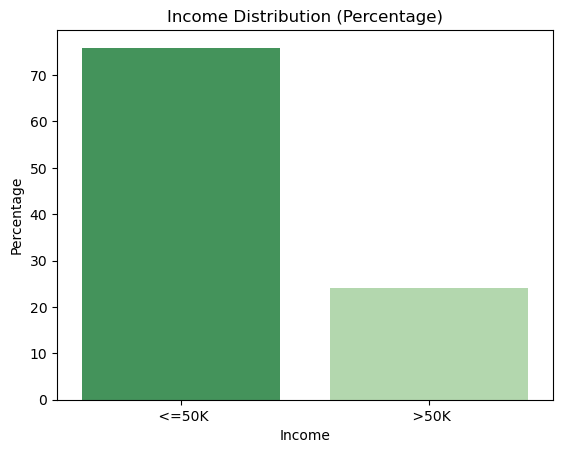

In [11]:
# Analyze class imbalance (Percentage distribution)
income_counts = df['income'].value_counts(normalize=True) * 100
# Create the countplot with percentages
sns.barplot(x=income_counts.index, y=income_counts.values, hue=income_counts.index, palette='Greens_r', dodge=False)

# Add labels
plt.xlabel("Income")
plt.ylabel("Percentage")
plt.title("Income Distribution (Percentage)")
plt.legend([], [], frameon=False)
plt.show()

Number of people earning above 50k is around 25%

In [12]:
# Create age groups
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

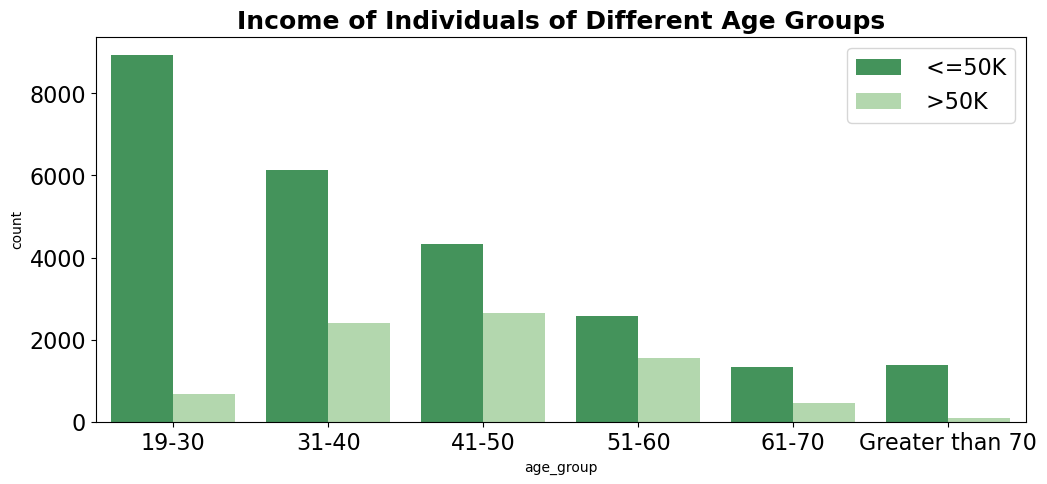

In [13]:
# Visualize income by age group
plt.figure(figsize=(12,5))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data=df, x='age_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

People earning more than 50k increases as age increases upto a certain extent.

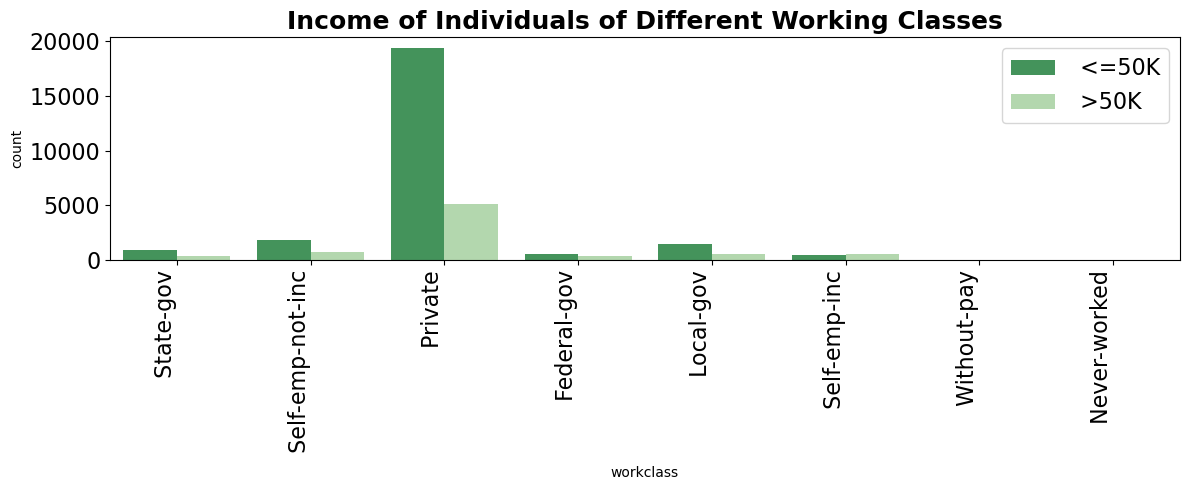

In [14]:
# Visualize income by workclass
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='workclass', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90, ha='right')
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

More people are working in private sector and their difference in salary is huge

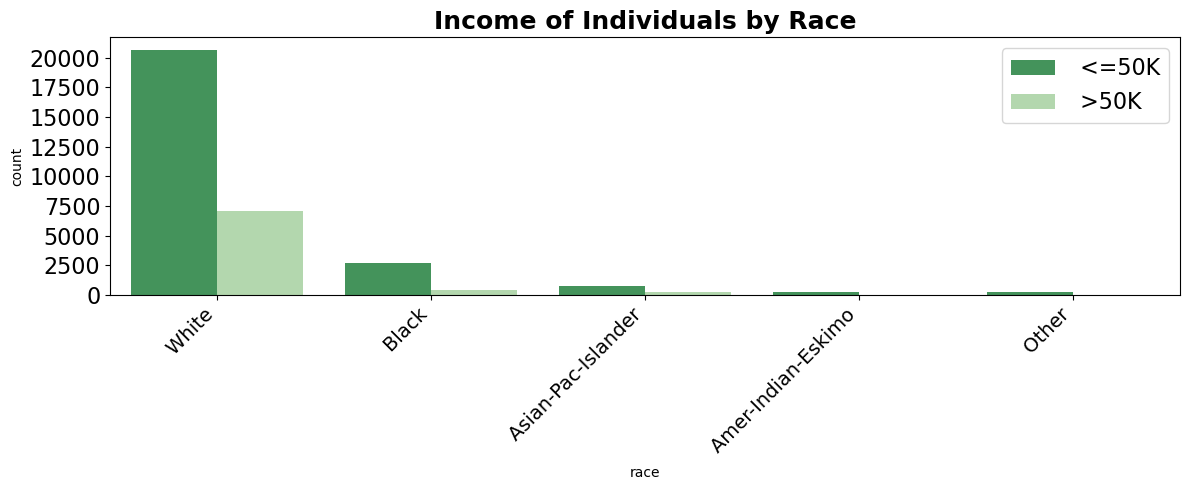

In [15]:
# Visualize income by race
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='race', hue='income', palette='Greens_r')
plt.title('Income of Individuals by Race', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

Data has more white people working.

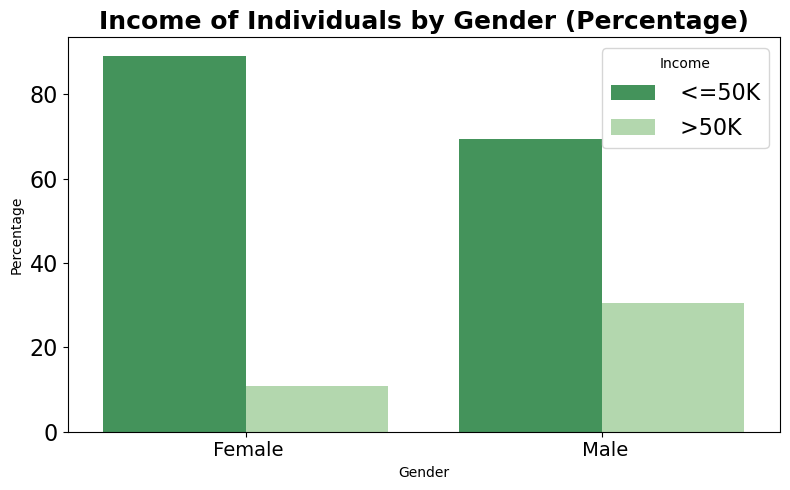

In [16]:
# Visualize income by gender (Percentage)
group_counts = df.groupby('gender')['income'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
plt.figure(figsize=(8,5))
sns.barplot(data=group_counts, x='gender', y='percentage', hue='income', palette='Greens_r')
plt.title('Income of Individuals by Gender (Percentage)', fontsize=18, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(title="Income", fontsize=16)
plt.tight_layout()
plt.show()

Around 30 % males and 10 % females earn more than 50k a year

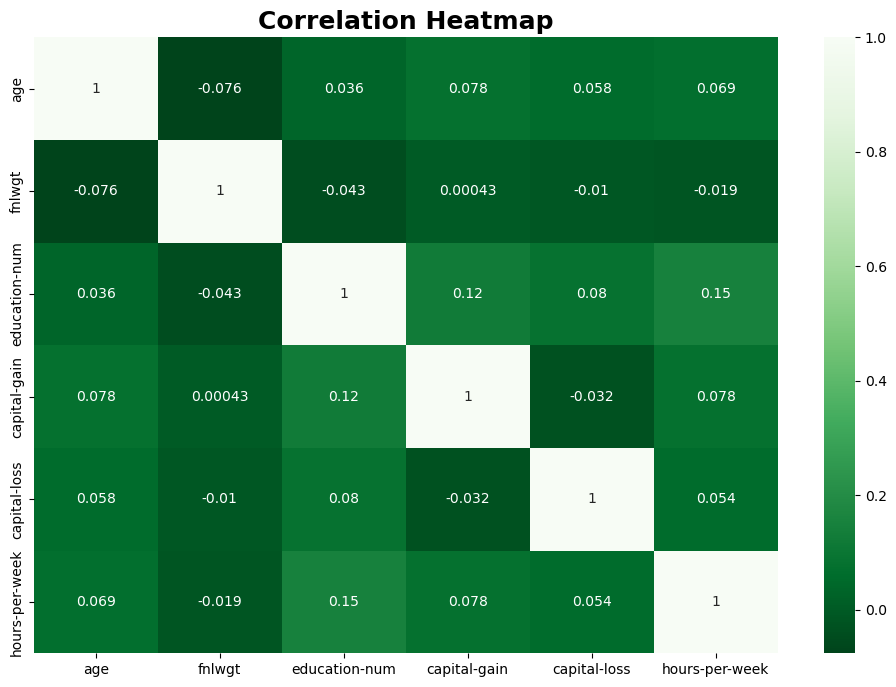

In [17]:
# Correlation heatmap of numerical features
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='Greens_r', annot=True)
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold')
plt.show()

Heatmap indicates that multicollinearity.

Positive relationships exist between education level and both hours worked and capital gains.

Age also shows a slight positive association with both capital gains and hours worked.

'fnlwgt' and 'capital-loss' appear to be largely independent of the other numerical features.

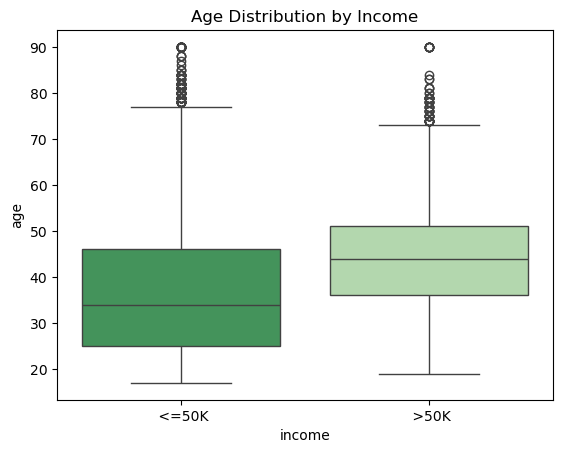

In [18]:
# Boxplot of age vs income
sns.boxplot(x="income", y="age", data=df, hue="income", palette='Greens_r', dodge=False)
plt.title("Age Distribution by Income")
plt.legend([], [], frameon=False)
plt.show()

Older individuals are more likely to fall into the higher income bracket.

There are outliers, this means there are some younger individuals earning >$50K and some older individuals earning <=$50K, but these are less common.

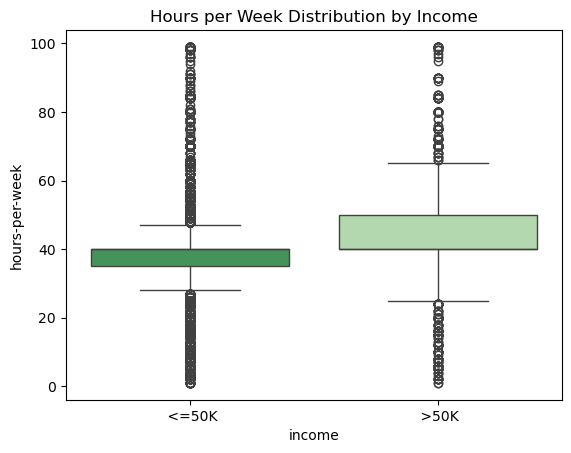

In [19]:
# Boxplot of hours-per-week vs income
sns.boxplot(x="income", y="hours-per-week", data=df, hue="income", palette='Greens_r', dodge=False)
plt.title("Hours per Week Distribution by Income")
plt.legend([], [], frameon=False)
plt.show()

People in the higher income bracket tend to work somewhat longer hours.

There are more high outliers in the >$50K group, suggesting some individuals work substantially more hours.

In [20]:
# Create new features
df["education_level_per_hour"] = df["education-num"] * df["hours-per-week"]
df["is_capital_gain"] = (df["capital-gain"] > 0).astype(int)

Split data

In [21]:
X = df.drop(['income'], axis=1)
y = df['income'].apply(lambda x: 1 if x.strip() == ">50K" else 0)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

Encode categorical variables

In [23]:
# Identify numerical and categorical features AFTER the split
num_features = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week", "fnlwgt", "education_level_per_hour", "is_capital_gain"] # Include new features
cat_features = list(set(X_train.columns) - set(num_features))
all_original_feature_names = X.columns.tolist()

In [24]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

Model Training & Testing

In [25]:
# Create pipeline for Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])


In [ ]:
# Create pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

In [27]:
# Define hyperparameters for tuning
logreg_params = {
    "classifier__C": [0.1, 1, 10]
}

rf_params = {
     "classifier__n_estimators": [50, 150, 250],
    "classifier__max_depth": [10, 15, 20],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2]
}


In [28]:
# Grid search with 5-fold CV for both models
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=5, scoring="roc_auc", n_jobs=-1)
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring="roc_auc", n_jobs=-1,verbose=2)

In [29]:
# Fit models
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [30]:
logreg_grid.fit(X_train, y_train)
best_logreg = logreg_grid.best_estimator_

In [31]:
# Evaluate on test set
y_pred_logreg = best_logreg.predict(X_test)
y_prob_logreg = best_logreg.predict_proba(X_test)[:, 1]

In [32]:
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

In [33]:
# Metrics
metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_logreg),
        "ROC AUC": roc_auc_score(y_test, y_prob_logreg),
        "F1 Score": f1_score(y_test, y_pred_logreg),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "ROC AUC": roc_auc_score(y_test, y_prob_rf),
        "F1 Score": f1_score(y_test, y_pred_rf),
    }
}
print("Model Performance Metrics:")
print(metrics)

Model Performance Metrics:
{'Logistic Regression': {'Accuracy': 0.8623232944068838, 'ROC AUC': 0.9165327467019195, 'F1 Score': 0.6874418604651162}, 'Random Forest': {'Accuracy': 0.8287236222085638, 'ROC AUC': 0.9192208141691225, 'F1 Score': 0.7046979865771812}}


Accuracy for logistic regression is around 86% and random forest is around 83%

 Model Interpretation


Top 10 Feature Importances (Permutation - Random Forest):
                                    feature  importance
2                         num__capital-gain    0.031178
17  cat__marital-status_ Married-civ-spouse    0.021156
1                        num__education-num    0.009800
0                                  num__age    0.007933
55                  cat__relationship_ Wife    0.007843
6             num__education_level_per_hour    0.006135
7                      num__is_capital_gain    0.005675
3                         num__capital-loss    0.004292
43           cat__occupation_ Other-service    0.004136
39         cat__occupation_ Exec-managerial    0.002090


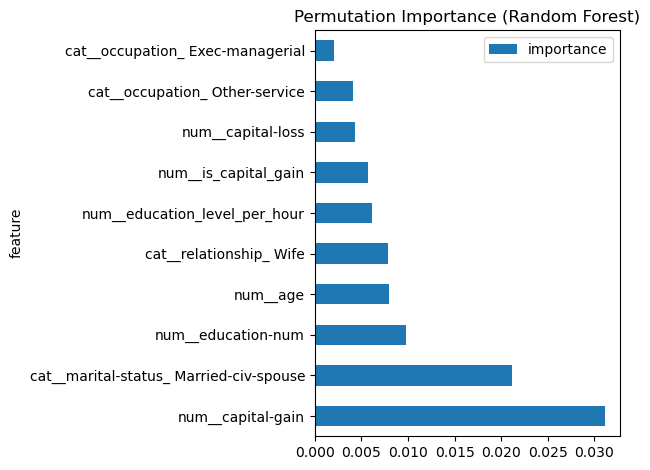

In [34]:

# Permutation Importance


preprocessor_rf = best_rf.named_steps['preprocessor']

# Transform the training data
X_train_transformed = preprocessor_rf.fit_transform(X_train)

# Transform the test data
X_test_transformed = preprocessor_rf.transform(X_test)

# Convert sparse matrices to dense arrays
X_train_dense = X_train_transformed.toarray()
X_test_dense = X_test_transformed.toarray()

# Fit the Random Forest model on the transformed training data
best_rf.named_steps['classifier'].fit(X_train_dense, y_train)

# Perform permutation importance on the transformed test data
result_rf = permutation_importance(
    best_rf.named_steps['classifier'], X_test_dense, y_test, n_repeats=10, random_state=42, scoring='f1'
)

# Get the feature names from the preprocessor
feature_names_after_transform = preprocessor_rf.get_feature_names_out()

# Create the DataFrame using the transformed feature names
importance_df_rf = pd.DataFrame({
     "feature": feature_names_after_transform,
    "importance": result_rf.importances_mean
}).sort_values(by="importance", ascending=False)

print("\nTop 10 Feature Importances (Permutation - Random Forest):")
print(importance_df_rf.head(10))

# Plot the top 10 feature importances
importance_df_rf.head(10).plot.barh(x="feature", y="importance", title="Permutation Importance (Random Forest)")
plt.tight_layout()
plt.show()


One surprising insight is the high importance of "num_capital-gain". While wealth accumulation is expected to correlate with income, its prominence as the top driver suggests it might be a more significant factor in distinguishing high-income earners than initially anticipated. Additionally, the substantial importance of "cat_marital-status_Married-civ-spouse" and "cat_relationship_Wife" highlights the strong social and household structure correlations with higher income levels in this dataset.

<Figure size 1000x800 with 0 Axes>

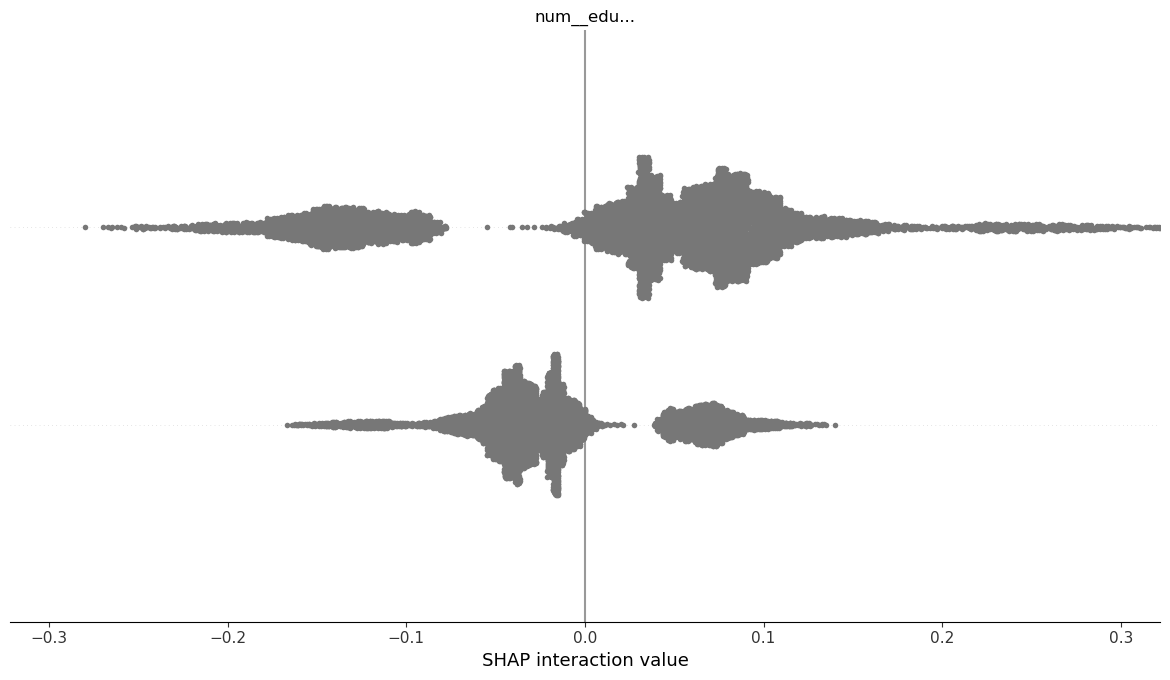

<Figure size 640x480 with 0 Axes>

In [39]:
# SHAP Analysis (Random Forest)
explainer_rf = shap.TreeExplainer(best_rf.named_steps['classifier'])
shap_values_rf = explainer_rf.shap_values(X_test_dense)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_rf, best_rf.named_steps['preprocessor'].transform(X_test), feature_names=feature_names_after_transform)
plt.tight_layout()
plt.show()

In [51]:
# Extract SHAP values for the positive class (>50K)
shap_values_positive_class = shap_values_rf[:, :, 1]

# Compute mean absolute SHAP values for each feature
shap_abs_rf = np.abs(shap_values_positive_class).mean(axis=0)

# Get the indices of the top 5 features
top_shap_indices_rf = np.argsort(shap_abs_rf)[::-1][:5]

# Map indices to feature names
top_shap_features_rf = [feature_names_after_transform[i] for i in top_shap_indices_rf]

# Extract scalar SHAP values for the top features
top_shap_importances_rf = shap_abs_rf[top_shap_indices_rf].tolist()  # Convert to scalars

# Print the top 5 features and their SHAP values
print("\nTop 5 Drivers of High Income (SHAP - Random Forest):")
for feature, importance in zip(top_shap_features_rf, top_shap_importances_rf):
    print(f"{feature}: {importance:.4f}")


Top 5 Drivers of High Income (SHAP - Random Forest):
cat__marital-status_ Married-civ-spouse: 0.0809
cat__relationship_ Husband: 0.0613
num__education_level_per_hour: 0.0486
num__education-num: 0.0467
num__age: 0.0339


The model strongly indicates that being a married civilian spouse and a husband are key positive predictors of high income, even more so than education level or age. his suggests socio-economic factors tied to these categories significantly influence income prediction beyond individual qualifications.

The engineered feature combining education and work hours also plays a notable role.

Pipeline Serialization and Loading

In [52]:
import joblib

joblib.dump(best_rf, "random_forest_pipeline.pkl")
print("Pipeline saved as random_forest_pipeline.pkl")

Pipeline saved as random_forest_pipeline.pkl


In [54]:
# Load the pipeline
loaded_pipeline = joblib.load("random_forest_pipeline.pkl")
print("Pipeline loaded successfully.")

# Define the new data
new_data = pd.DataFrame({
    "age": [39],
    "workclass": ["Private"],
    "fnlwgt": [123456],
    "education": ["Bachelors"],
    "education-num": [13],
    "marital-status": ["Married-civ-spouse"],
    "occupation": ["Exec-managerial"],
    "relationship": ["Husband"],
    "race": ["White"],
    "gender": ["Male"],
    "capital-gain": [0],
    "capital-loss": [0],
    "hours-per-week": [40],
    "native-country": ["United-States"]
})

# Define the age_group function
def age_group(x):
    x = int(x)
    x = abs(x)
    if 18 < x < 31:
        return "19-30"
    if 30 < x < 41:
        return "31-40"
    if 40 < x < 51:
        return "41-50"
    if 50 < x < 61:
        return "51-60"
    if 60 < x < 71:
        return "61-70"
    else:
        return "Greater than 70"

# Add the age_group column to the new data
new_data["age_group"] = new_data["age"].apply(age_group)

# Add feature engineering steps
new_data["education_level_per_hour"] = new_data["education-num"] * new_data["hours-per-week"]
new_data["is_capital_gain"] = (new_data["capital-gain"] > 0).astype(int)

# Preprocess new data
new_data_processed = loaded_pipeline.named_steps["preprocessor"].transform(new_data)

# Predict income class
prediction = loaded_pipeline.named_steps["classifier"].predict(new_data_processed)
print("Prediction:", ">50K" if prediction[0] == 1 else "<=50K")

Pipeline loaded successfully.
Prediction: <=50K
